# Pre-Processing and Training Data

## Imports

In [90]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
import lazypredict
from lazypredict.Supervised import LazyRegressor

from library.sb_utils import save_file

## 4.4 Load Data<a id='4.4_Load_Data'></a>

In [91]:
batch_data = pd.read_csv('./data/batch_data_clean.csv')
print(batch_data.head())
batch_data_dropna = batch_data.dropna()

recipe_data = pd.read_csv('./data/recipe_data_clean.csv')
print(recipe_data.head())
recipe_data_dropna = recipe_data.dropna()

   rcp_id  base_malt_pct  Boil Kettle  Whirlpool  Fermenter  Total Hops  \
0     102          79.10         7.94       0.44       1.20        9.58   
1     102          79.10         7.94       0.44       1.20        9.58   
2     102          79.10         7.94       0.44       1.20        9.58   
3     102          79.10         7.94       0.44       1.20        9.58   
4     102          79.10         7.94       0.44       1.20        9.58   

   fermenter_temperature  cu_low  cu_high  cu_setpoint  pre_run_dump_volume  \
0                  33.00    0.40     0.70         0.40                  nan   
1                  33.00    0.40     0.70         0.40                  nan   
2                  36.00    0.15     0.25         0.40                  nan   
3                  36.00    0.30     0.80         0.80                  nan   
4                  33.20    0.24     0.80         8.00                  nan   

   original_gravity  clar_eff  
0             14.38     90.21  
1         

In [92]:
print(batch_data.shape)
print(recipe_data.shape)

(1123, 13)
(270, 13)


## 4.6 Train/Test Split<a id='4.6_Train/Test_Split'></a>

What partition sizes would you have with a 70/30 train/test split?

In [93]:
len(batch_data) * .7, len(batch_data) * .3, len(recipe_data) * .7, len(recipe_data) * .3

(786.0999999999999, 336.9, 189.0, 81.0)

In [94]:
Xbatch_train, Xbatch_test, ybatch_train, ybatch_test = train_test_split(batch_data.drop(columns='clar_eff'), 
                                                    batch_data.clar_eff, test_size=0.3, 
                                                    random_state=47)
                            
Xrcp_train, Xrcp_test, yrcp_train, yrcp_test = train_test_split(recipe_data.drop(columns='clar_eff'), 
                                                    recipe_data.clar_eff, test_size=0.3, 
                                                    random_state=47)

Xbatch_train_dropna, Xbatch_test_dropna, ybatch_train_dropna, ybatch_test_dropna = train_test_split(batch_data_dropna.drop(columns='clar_eff'), 
                                                    batch_data_dropna.clar_eff, test_size=0.3, 
                                                    random_state=47)
                            
Xrcp_train_dropna, Xrcp_test_dropna, yrcp_train_dropna, yrcp_test_dropna = train_test_split(recipe_data_dropna.drop(columns='clar_eff'), 
                                                    recipe_data_dropna.clar_eff, test_size=0.3, 
                                                    random_state=47)

In [95]:
Xbatch_train.shape, Xbatch_test.shape, Xrcp_train.shape, Xrcp_test.shape, Xbatch_train_dropna.shape, Xbatch_test_dropna.shape, Xrcp_train_dropna.shape, Xrcp_test_dropna.shape

((786, 12),
 (337, 12),
 (189, 12),
 (81, 12),
 (284, 12),
 (122, 12),
 (49, 12),
 (21, 12))

In [96]:
ybatch_train.shape, ybatch_test.shape, yrcp_train.shape, yrcp_test.shape, ybatch_train_dropna.shape, ybatch_test_dropna.shape, yrcp_train_dropna.shape, yrcp_test_dropna.shape

((786,), (337,), (189,), (81,), (284,), (122,), (49,), (21,))

In [97]:
#Code task 2#
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
Xbatch_train.dtypes, Xrcp_train.dtypes

(rcp_id                     int64
 base_malt_pct            float64
 Boil Kettle              float64
 Whirlpool                float64
 Fermenter                float64
 Total Hops               float64
 fermenter_temperature    float64
 cu_low                   float64
 cu_high                  float64
 cu_setpoint              float64
 pre_run_dump_volume      float64
 original_gravity         float64
 dtype: object,
 rcp_id                     int64
 base_malt_pct            float64
 Boil Kettle              float64
 Whirlpool                float64
 Fermenter                float64
 Total Hops               float64
 fermenter_temperature    float64
 cu_low                   float64
 cu_high                  float64
 cu_setpoint              float64
 pre_run_dump_volume      float64
 original_gravity         float64
 dtype: object)

In [98]:
#Code task 3#
#Repeat this check for the test split in `X_test`
Xbatch_test.dtypes, Xrcp_test.dtypes

(rcp_id                     int64
 base_malt_pct            float64
 Boil Kettle              float64
 Whirlpool                float64
 Fermenter                float64
 Total Hops               float64
 fermenter_temperature    float64
 cu_low                   float64
 cu_high                  float64
 cu_setpoint              float64
 pre_run_dump_volume      float64
 original_gravity         float64
 dtype: object,
 rcp_id                     int64
 base_malt_pct            float64
 Boil Kettle              float64
 Whirlpool                float64
 Fermenter                float64
 Total Hops               float64
 fermenter_temperature    float64
 cu_low                   float64
 cu_high                  float64
 cu_setpoint              float64
 pre_run_dump_volume      float64
 original_gravity         float64
 dtype: object)

## 4.7 Initial Not-Even-A-Model<a id='4.7_Initial_Not-Even-A-Model'></a>

A good place to start is to see how good the mean is as a predictor. In other words, what if you simply say your best guess is the average price?

In [99]:
#Code task 4#
#Calculate the mean of `y_train`
batch_train_mean = ybatch_train.mean()
rcp_train_mean = yrcp_train.mean()
batch_train_mean, rcp_train_mean

(88.63988797206473, 89.02285206668988)

`sklearn`'s `DummyRegressor` easily does this:

In [100]:
#Code task 5#
#Fit the dummy regressor on the training data
#Hint, call its `.fit()` method with `X_train` and `y_train` as arguments
#Then print the object's `constant_` attribute and verify it's the same as the mean above
batch_dumb_reg = DummyRegressor(strategy='mean')
batch_dumb_reg.fit(Xbatch_train, ybatch_train)
rcp_dumb_reg = DummyRegressor(strategy='mean')
rcp_dumb_reg.fit(Xrcp_train, yrcp_train)

batch_dumb_reg.constant_, rcp_dumb_reg.constant_

(array([[88.63988797]]), array([[89.02285207]]))

How good is this? How closely does this match, or explain, the actual values? There are many ways of assessing how good one set of values agrees with another, which brings us to the subject of metrics.

### 4.7.1 Metrics<a id='4.7.1_Metrics'></a>

Make your predictions by creating an array of length the size of the training set with the single value of the mean.

In [101]:
batch_y_tr_pred = batch_dumb_reg.predict(Xbatch_train)
rcp_y_tr_pred = rcp_dumb_reg.predict(Xrcp_train)
batch_y_tr_pred[:5], rcp_y_tr_pred[:5]

(array([88.63988797, 88.63988797, 88.63988797, 88.63988797, 88.63988797]),
 array([89.02285207, 89.02285207, 89.02285207, 89.02285207, 89.02285207]))

In [102]:
batch_y_te_pred = batch_train_mean * np.ones(len(ybatch_test))
rcp_y_te_pred = rcp_train_mean * np.ones(len(yrcp_test))

##### 4.7.2.0.1 R-squared<a id='4.7.2.0.1_R-squared'></a>

In [103]:
r2_score(ybatch_train, batch_y_tr_pred), r2_score(ybatch_test, batch_y_te_pred), r2_score(yrcp_train, rcp_y_tr_pred), r2_score(yrcp_test, rcp_y_te_pred)

(0.0, -0.0006804242642879377, 0.0, -0.013549097756625272)

##### 4.7.2.0.2 Mean absolute error<a id='4.7.2.0.2_Mean_absolute_error'></a>

In [104]:
mean_absolute_error(ybatch_train, batch_y_tr_pred), mean_absolute_error(ybatch_test, batch_y_te_pred), mean_absolute_error(yrcp_train, rcp_y_tr_pred), mean_absolute_error(yrcp_test, rcp_y_te_pred)

(5.178827410656105, 5.107823347731024, 4.270977808838201, 4.914091276301813)

##### 4.7.2.0.3 Mean squared error<a id='4.7.2.0.3_Mean_squared_error'></a>

In [105]:
mean_squared_error(ybatch_train, batch_y_tr_pred), mean_squared_error(ybatch_test, batch_y_te_pred), mean_squared_error(yrcp_train, rcp_y_tr_pred), mean_squared_error(yrcp_test, rcp_y_te_pred)

(53.00478395035792, 49.310261035176644, 30.929299287674045, 53.41351318461643)

## 4.8 Initial Models<a id='4.8_Initial_Models'></a>

### 4.8.1 Imputing missing feature (predictor) values<a id='4.8.1_Imputing_missing_feature_(predictor)_values'></a>

There's missing values. Recall from your data exploration that many distributions were skewed. Your first thought might be to impute missing values using the median.

#### No impute - drop NA values

In [106]:
Xbatch_tr = Xbatch_train_dropna
Xbatch_te = Xbatch_test_dropna

Xrcp_tr = Xrcp_train_dropna
Xrcp_te = Xrcp_test_dropna

In [107]:
scaler_batch = StandardScaler()
scaler_batch.fit(Xbatch_tr)
Xbatch_tr_scaled = scaler_batch.transform(Xbatch_tr)
Xbatch_te_scaled = scaler_batch.transform(Xbatch_te)

scaler_rcp = StandardScaler()
scaler_rcp.fit(Xrcp_tr)
Xrcp_tr_scaled = scaler_rcp.transform(Xrcp_tr)
Xrcp_te_scaled = scaler_rcp.transform(Xrcp_te)

In [108]:
lm_batch = LinearRegression().fit(Xbatch_tr_scaled, ybatch_train_dropna)

lm_rcp = LinearRegression().fit(Xrcp_tr_scaled, yrcp_train_dropna)

In [109]:
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
ybatch_tr_pred = lm_batch.predict(Xbatch_tr_scaled)
ybatch_te_pred = lm_batch.predict(Xbatch_te_scaled)

yrcp_tr_pred = lm_rcp.predict(Xrcp_tr_scaled)
yrcp_te_pred = lm_rcp.predict(Xrcp_te_scaled)

In [110]:
# r^2 - train, test
dropna_r2_batch = r2_score(ybatch_train_dropna, ybatch_tr_pred), r2_score(ybatch_test_dropna, ybatch_te_pred)
print(dropna_r2_batch)

dropna_r2_rcp = r2_score(yrcp_train_dropna, yrcp_tr_pred), r2_score(yrcp_test_dropna, yrcp_te_pred)
print(dropna_r2_rcp)

(0.3039491372539682, 0.2903980465667082)
(0.5528035993977232, -0.2706363241949459)


In [111]:
#Code task 12#
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
dropna_mae = mean_absolute_error(ybatch_train_dropna, ybatch_tr_pred), mean_absolute_error(ybatch_test_dropna, ybatch_te_pred)
print(dropna_mae)

dropna_mae = mean_absolute_error(yrcp_train_dropna, yrcp_tr_pred), mean_absolute_error(yrcp_test_dropna, yrcp_te_pred)
print(dropna_mae)

(4.191480033169084, 3.94757332182089)
(2.75657887696614, 5.685753416021633)


#### Impute missing values with median

In [112]:
Xbatch_tr = Xbatch_train
Xbatch_te = Xbatch_test

Xrcp_tr = Xrcp_train
Xrcp_te = Xrcp_test

In [113]:
# These are the values we'll use to fill in any missing values
Xbatch_defaults_median = Xbatch_train.median()
Xrcp_defaults_median = Xrcp_train.median()

Xbatch_defaults_median, Xrcp_defaults_median

(rcp_id                  156.00
 base_malt_pct            77.27
 Boil Kettle               4.56
 Whirlpool                 0.44
 Fermenter                 1.20
 Total Hops                5.63
 fermenter_temperature    33.00
 cu_low                    0.18
 cu_high                   0.38
 cu_setpoint               0.50
 pre_run_dump_volume       3.20
 original_gravity         14.30
 dtype: float64,
 rcp_id                  284.00
 base_malt_pct            68.95
 Boil Kettle               2.00
 Whirlpool                 0.39
 Fermenter                 0.59
 Total Hops                2.88
 fermenter_temperature    32.40
 cu_low                    0.23
 cu_high                   0.40
 cu_setpoint               0.60
 pre_run_dump_volume       0.95
 original_gravity         12.75
 dtype: float64)

In [114]:
#Code task 9#
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
Xbatch_tr = Xbatch_train.fillna(Xbatch_defaults_median)
Xbatch_te = Xbatch_test.fillna(Xbatch_defaults_median)

Xrcp_tr = Xrcp_train.fillna(Xrcp_defaults_median)
Xrcp_te = Xrcp_test.fillna(Xrcp_defaults_median)

In [115]:
#Code task 10#
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler_batch = StandardScaler()
scaler_batch.fit(Xbatch_tr)
Xbatch_tr_scaled = scaler_batch.transform(Xbatch_tr)
Xbatch_te_scaled = scaler_batch.transform(Xbatch_te)

scaler_rcp = StandardScaler()
scaler_rcp.fit(Xrcp_tr)
Xrcp_tr_scaled = scaler_rcp.transform(Xrcp_tr)
Xrcp_te_scaled = scaler_rcp.transform(Xrcp_te)

In [116]:
lm_batch = LinearRegression().fit(Xbatch_tr_scaled, ybatch_train)

lm_rcp = LinearRegression().fit(Xrcp_tr_scaled, yrcp_train)

In [117]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
ybatch_tr_pred = lm_batch.predict(Xbatch_tr_scaled)
ybatch_te_pred = lm_batch.predict(Xbatch_te_scaled)

yrcp_tr_pred = lm_rcp.predict(Xrcp_tr_scaled)
yrcp_te_pred = lm_rcp.predict(Xrcp_te_scaled)

In [118]:
# r^2 - train, test
median_r2_batch = r2_score(ybatch_train, ybatch_tr_pred), r2_score(ybatch_test, ybatch_te_pred)
print(median_r2_batch)

median_r2_rcp = r2_score(yrcp_train, yrcp_tr_pred), r2_score(yrcp_test, yrcp_te_pred)
print(median_r2_rcp)

(0.2422449476741496, 0.17721173972436888)
(0.21830844224738144, 0.13280316307397677)


In [119]:
#Code task 12#
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae_batch = mean_absolute_error(ybatch_train, ybatch_tr_pred), mean_absolute_error(ybatch_test, ybatch_te_pred)
print(median_mae_batch)

median_mae_rcp = mean_absolute_error(yrcp_train, yrcp_tr_pred), mean_absolute_error(yrcp_test, yrcp_te_pred)
print(median_mae_rcp)

(4.164498665702029, 4.399742209171063)
(3.6855382863420694, 4.425030938847785)


In [120]:
#Code task 13#
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse_batch = mean_squared_error(ybatch_train, ybatch_tr_pred), mean_squared_error(ybatch_test, ybatch_te_pred)
print(median_mse_batch)

median_mse_rcp = mean_squared_error(yrcp_train, yrcp_tr_pred), mean_squared_error(yrcp_test, yrcp_te_pred)
print(median_mse_rcp)

(40.164642835823855, 40.544316554107844)
(24.17717214037888, 45.70082474083385)


#### Impute missing values with the mean

In [121]:
#Code task 14#
#As we did for the median above, calculate mean values for imputing missing values
# These are the values we'll use to fill in any missing values
Xbatch_defaults_mean = Xbatch_train.mean()
Xrcp_defaults_mean = Xrcp_train.mean()

Xbatch_defaults_mean, Xrcp_defaults_mean

(rcp_id                  194.96
 base_malt_pct            72.41
 Boil Kettle               5.43
 Whirlpool                 0.41
 Fermenter                 0.85
 Total Hops                6.69
 fermenter_temperature    33.34
 cu_low                    0.25
 cu_high                   0.45
 cu_setpoint               0.65
 pre_run_dump_volume       5.13
 original_gravity         13.56
 dtype: float64,
 rcp_id                  279.56
 base_malt_pct            67.59
 Boil Kettle               4.79
 Whirlpool                 0.51
 Fermenter                 0.79
 Total Hops                6.09
 fermenter_temperature    32.65
 cu_low                    0.33
 cu_high                   0.52
 cu_setpoint               0.75
 pre_run_dump_volume       1.71
 original_gravity         13.66
 dtype: float64)

In [122]:
Xbatch_tr = Xbatch_train.fillna(Xbatch_defaults_mean)
Xbatch_te = Xbatch_test.fillna(Xbatch_defaults_mean)

Xrcp_tr = Xrcp_train.fillna(Xrcp_defaults_mean)
Xrcp_te = Xrcp_test.fillna(Xrcp_defaults_mean)

In [123]:
scaler_batch = StandardScaler()
scaler_batch.fit(Xbatch_tr)
Xbatch_tr_scaled = scaler_batch.transform(Xbatch_tr)
Xbatch_te_scaled = scaler_batch.transform(Xbatch_te)

scaler_rcp = StandardScaler()
scaler_rcp.fit(Xrcp_tr)
Xrcp_tr_scaled = scaler_rcp.transform(Xrcp_tr)
Xrcp_te_scaled = scaler_rcp.transform(Xrcp_te)

In [124]:
lm_batch = LinearRegression().fit(Xbatch_tr_scaled, ybatch_train)

lm_rcp = LinearRegression().fit(Xrcp_tr_scaled, yrcp_train)

In [125]:
ybatch_tr_pred = lm_batch.predict(Xbatch_tr_scaled)
ybatch_te_pred = lm_batch.predict(Xbatch_te_scaled)

yrcp_tr_pred = lm_rcp.predict(Xrcp_tr_scaled)
yrcp_te_pred = lm_rcp.predict(Xrcp_te_scaled)

In [126]:
mean_r2_batch = r2_score(ybatch_train, ybatch_tr_pred), r2_score(ybatch_test, ybatch_te_pred)
print(mean_r2_batch)

mean_r2_rcp = r2_score(yrcp_train, yrcp_tr_pred), r2_score(yrcp_test, yrcp_te_pred)
print(mean_r2_rcp)

(0.24003030089376942, 0.15241469089905457)
(0.20940041062562242, 0.09894194186037852)


In [127]:
mean_mae_batch = mean_absolute_error(ybatch_train, ybatch_tr_pred), mean_absolute_error(ybatch_test, ybatch_te_pred)
print(mean_mae_batch)

mean_mae_rcp = mean_absolute_error(yrcp_train, yrcp_tr_pred), mean_absolute_error(yrcp_test, yrcp_te_pred)
print(mean_mae_rcp)

(4.184135034392112, 4.530376607740769)
(3.722698262039798, 4.489841437398284)


In [128]:
mean_mse_batch = mean_squared_error(ybatch_train, ybatch_tr_pred), mean_squared_error(ybatch_test, ybatch_te_pred)
print(mean_mse_batch)

mean_mse_rcp = mean_squared_error(yrcp_train, yrcp_tr_pred), mean_squared_error(yrcp_test, yrcp_te_pred)
print(mean_mse_rcp)

(40.28202970994426, 41.76623408225101)
(24.45269131647233, 47.48529358377691)


#### lazypredict with dropna

In [129]:
Xbatch_tr = Xbatch_train_dropna
Xbatch_te = Xbatch_test_dropna

Xrcp_tr = Xrcp_train_dropna
Xrcp_te = Xrcp_test_dropna

In [130]:
reg_batch_dropna = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models_batch_dropna, predictions_batch_dropna = reg_batch_dropna.fit(Xbatch_tr, Xbatch_te, ybatch_train, ybatch_test)

reg_rcp_dropna = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models_rcp_dropna, predictions_rcp_dropna = reg_rcp_dropna.fit(Xrcp_tr, Xrcp_te, yrcp_train, yrcp_test)

  0%|          | 0/42 [00:00<?, ?it/s]

AdaBoostRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
BaggingRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
BayesianRidge model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
DecisionTreeRegressor model failed to execute
Number of labels=786 does not match number of samples=284
DummyRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
ElasticNet model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
ElasticNetCV model failed to execute
X and y have inconsistent dimensions (284 != 786)
ExtraTreeRegressor model failed to execute
Number of labels=786 does not match number of samples=284
ExtraTreesRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
GammaRegressor model failed to execute
Foun

 45%|████▌     | 19/42 [00:00<00:00, 186.27it/s]

Lars model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
LarsCV model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
Lasso model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
LassoCV model failed to execute
X and y have inconsistent dimensions (284 != 786)
LassoLars model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
LassoLarsCV model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
LassoLarsIC model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
LinearRegression model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
LinearSVR model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
MLPRegressor model failed to execute
Found input variables with inconsistent nu

  0%|          | 0/42 [00:00<?, ?it/s]

SGDRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
SVR model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
TransformedTargetRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
TweedieRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
XGBRegressor model failed to execute
[22:05:25] C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\data\data.cc:373: Check failed: labels_.Size() == num_row_ (786 vs. 284) : Size of labels must equal to number of rows.
LGBMRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [284, 786]
AdaBoostRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
BaggingRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [49,

 33%|███▎      | 14/42 [00:00<00:00, 139.30it/s]

GeneralizedLinearRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
GradientBoostingRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
HistGradientBoostingRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
HuberRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
KNeighborsRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
KernelRidge model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
Lars model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
LarsCV model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
Lasso model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]


 69%|██████▉   | 29/42 [00:00<00:00, 144.73it/s]

LassoCV model failed to execute
X and y have inconsistent dimensions (49 != 189)
LassoLars model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
LassoLarsCV model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
LassoLarsIC model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
LinearRegression model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
LinearSVR model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
MLPRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
NuSVR model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
OrthogonalMatchingPursuit model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
OrthogonalMatchingPursuitCV model failed to execute
Found inp

100%|██████████| 42/42 [00:00<00:00, 155.27it/s]

SVR model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
TransformedTargetRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
TweedieRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]
XGBRegressor model failed to execute
[22:05:25] C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\data\data.cc:373: Check failed: labels_.Size() == num_row_ (189 vs. 49) : Size of labels must equal to number of rows.
LGBMRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [49, 189]


In [131]:
print(models_batch_dropna)

Empty DataFrame
Columns: [Adjusted R-Squared, R-Squared, RMSE, Time Taken]
Index: []


#### lazypredict with median impute

In [132]:
Xbatch_tr = Xbatch_train.fillna(Xbatch_defaults_median)
Xbatch_te = Xbatch_test.fillna(Xbatch_defaults_median)

Xrcp_tr = Xrcp_train.fillna(Xrcp_defaults_median)
Xrcp_te = Xrcp_test.fillna(Xrcp_defaults_median)

In [133]:
reg_batch = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models_batch, predictions_batch = reg_batch.fit(Xbatch_tr, Xbatch_te, ybatch_train, ybatch_test)

reg_rcp = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models_rcp, predictions_rcp = reg_rcp.fit(Xrcp_tr, Xrcp_te, yrcp_train, yrcp_test)

100%|██████████| 42/42 [00:01<00:00, 30.84it/s]


In [134]:
print(models_batch)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.38       0.40  5.44        0.25
RandomForestRegressor                        0.34       0.37  5.59        0.32
BaggingRegressor                             0.31       0.34  5.72        0.04
XGBRegressor                                 0.31       0.33  5.73        0.06
LGBMRegressor                                0.29       0.32  5.80        0.05
HistGradientBoostingRegressor                0.29       0.32  5.81        0.67
GradientBoostingRegressor                    0.28       0.31  5.84        0.11
NuSVR                                        0.17       0.20  6.27        0.03
ElasticNetCV                                 0.16       0.19  6.34        0.05
BayesianRidge                                0.15       0.18  6.34        0.01
LassoLarsCV                                  0.15   

In [135]:
print(models_rcp)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
TransformedTargetRegressor                  -0.02       0.13  6.76        0.01
LinearRegression                            -0.02       0.13  6.76        0.01
HuberRegressor                              -0.04       0.11  6.83        0.02
AdaBoostRegressor                           -0.06       0.10  6.88        0.09
PoissonRegressor                            -0.08       0.08  6.96        0.01
Ridge                                       -0.08       0.08  6.96        0.01
SGDRegressor                                -0.08       0.08  6.97        0.01
RidgeCV                                     -0.09       0.08  6.97        0.01
LassoLarsIC                                 -0.09       0.07  6.98        0.01
BayesianRidge                               -0.09       0.07  7.00        0.01
RandomForestRegressor                       -0.11   

### Pipelines

One of the most important and useful components of `sklearn` is the [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). In place of `panda`'s `fillna` DataFrame method, there is `sklearn`'s `SimpleImputer`. Remember the first linear model above performed the steps:

1. replace missing values with the median for each feature
2. scale the data to zero mean and unit variance
3. train a linear regression model

and all these steps were trained on the train split and then applied to the test split for assessment.

The pipeline below defines exactly those same steps. Crucially, the resultant `Pipeline` object has a `fit()` method and a `predict()` method, just like the `LinearRegression()` object itself. Just as you might create a linear regression model and train it with `.fit()` and predict with `.predict()`, you can wrap the entire process of imputing and feature scaling and regression in a single object you can train with `.fit()` and predict with `.predict()`. And that's basically a pipeline: a model on steroids.

#### 4.8.2.1 Define the pipeline<a id='4.8.2.1_Define_the_pipeline'></a>

In [136]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    ExtraTreesRegressor()
)

In [137]:
type(pipe)

sklearn.pipeline.Pipeline

In [138]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

#### 4.8.2.2 Fit the pipeline<a id='4.8.2.2_Fit_the_pipeline'></a>

In [139]:
#Code task 15#
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(Xbatch_tr, ybatch_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('extratreesregressor', ExtraTreesRegressor())])

#### 4.8.2.3 Make predictions on the train and test sets<a id='4.8.2.3_Make_predictions_on_the_train_and_test_sets'></a>

In [140]:
y_tr_pred = pipe.predict(Xbatch_tr)
y_te_pred = pipe.predict(Xbatch_te)

#### 4.8.2.4 Assess performance<a id='4.8.2.4_Assess_performance'></a>

In [141]:
r2_score(ybatch_train, y_tr_pred), r2_score(ybatch_test, y_te_pred)

(0.9998610780647814, 0.4055474921416551)

In [142]:
mean_absolute_error(ybatch_train, y_tr_pred), mean_absolute_error(ybatch_test, y_te_pred)

(0.004328592232170099, 2.737074280748802)

In [143]:
mean_squared_error(ybatch_train, y_tr_pred), mean_squared_error(ybatch_test, y_te_pred)

(0.00736352716222798, 29.292676887390254)

## 4.9 Refining The Linear Model<a id='4.9_Refining_The_Linear_Model'></a>

You suspected the model was overfitting. This is no real surprise given the number of features you blindly used. It's likely a judicious subset of features would generalize better. `sklearn` has a number of feature selection functions available. The one you'll use here is `SelectKBest` which, as you might guess, selects the k best features. You can read about SelectKBest 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest). `f_regression` is just the [score function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression) you're using because you're performing regression. It's important to choose an appropriate one for your machine learning task.

### 4.9.1 Define the pipeline<a id='4.9.1_Define_the_pipeline'></a>

Redefine your pipeline to include this feature selection step:

In [144]:
#Code task 16#
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression, k=8),
    ExtraTreesRegressor()
)

### 4.9.2 Fit the pipeline<a id='4.9.2_Fit_the_pipeline'></a>

In [145]:
pipe.fit(Xbatch_tr, ybatch_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x0000022D779F4550>)),
                ('extratreesregressor', ExtraTreesRegressor())])

### 4.9.3 Assess performance on the train and test set<a id='4.9.3_Assess_performance_on_the_train_and_test_set'></a>

In [146]:
y_tr_pred = pipe.predict(Xbatch_tr)
y_te_pred = pipe.predict(Xbatch_te)

In [147]:
r2_score(ybatch_train, y_tr_pred), r2_score(ybatch_test, y_te_pred)

(0.9996041170651675, 0.3477044582694985)

In [148]:
mean_absolute_error(ybatch_train, y_tr_pred), mean_absolute_error(ybatch_test, y_te_pred)

(0.012438460620211497, 2.958897033044684)

### 4.9.7 Assessing performance using cross-validation<a id='4.9.7_Assessing_performance_using_cross-validation'></a>

In [149]:
cv_results = cross_validate(pipe, Xbatch_tr, ybatch_train, cv=5)

In [150]:
cv_scores = cv_results['test_score']
cv_scores

array([0.50214188, 0.42941675, 0.36496809, 0.31685118, 0.27702821])

Without using the same random state for initializing the CV folds, your actual numbers will be different.

In [151]:
np.mean(cv_scores), np.std(cv_scores)

(0.37808122215989715, 0.08019871152053107)

These results highlight that assessing model performance in inherently open to variability. You'll get different results depending on the quirks of which points are in which fold. An advantage of this is that you can also obtain an estimate of the variability, or uncertainty, in your performance estimate.

In [152]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.22, 0.54])

### Hyperparameter search using GridSearchCV (with Extra Trees Regressor)

In [153]:
#Code task 18#
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'extratreesregressor', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'extratreesregressor__bootstrap', 'extratreesregressor__ccp_alpha', 'extratreesregressor__criterion', 'extratreesregressor__max_depth', 'extratreesregressor__max_features', 'extratreesregressor__max_leaf_nodes', 'extratreesregressor__max_samples', 'extratreesregressor__min_impurity_decrease', 'extratreesregressor__min_impurity_split', 'extratreesregressor__min_samples_leaf', 'extratreesregressor__min_samples_split', 'extratreesregressor__min_weight_fraction_leaf', 'extratreesregressor__n_estimators', 'extratreesregressor__n_jobs', 'extratreesregressor__oob_score', 'extratreesregresso

The above can be particularly useful as your pipelines becomes more complex (you can even nest pipelines within pipelines).

In [154]:
k = [k+1 for k in range(len(Xbatch_train.columns))]
grid_params = {'selectkbest__k': k}

Now you have a range of `k` to investigate. Is 1 feature best? 2? 3? 4? All of them? You could write a for loop and iterate over each possible value, doing all the housekeeping oyurselves to track the best value of k. But this is  a common task so there's a built in function in `sklearn`. This is [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
This takes the pipeline object, in fact it takes anything with a `.fit()` and `.predict()` method. In simple cases with no feature selection or imputation or feature scaling etc. you may see the classifier or regressor object itself directly passed into `GridSearchCV`. The other key input is the parameters and values to search over. Optional parameters include the cross-validation strategy and number of CPUs to use.

In [155]:
etr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [156]:
etr_grid_cv.fit(Xbatch_train, ybatch_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=8,
                                                    score_func=<function f_regression at 0x0000022D779F4550>)),
                                       ('extratreesregressor',
                                        ExtraTreesRegressor())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12]})

In [157]:
score_mean = etr_grid_cv.cv_results_['mean_test_score']
score_std = etr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in etr_grid_cv.cv_results_['param_selectkbest__k']]

In [158]:
#Code task 19#
#Print the `best_params_` attribute of `lr_grid_cv`
etr_grid_cv.best_params_

{'selectkbest__k': 12}

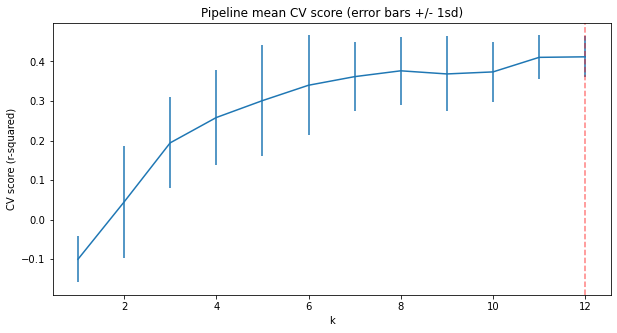

In [159]:
#Code task 20#
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = etr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

### Hyperparameter search using GridSearchCV (with LinearRegressor)

In [160]:
#Code task 16#
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression, k=8),
    LinearRegression()
)

### 4.9.2 Fit the pipeline<a id='4.9.2_Fit_the_pipeline'></a>

In [161]:
pipe.fit(Xbatch_tr, ybatch_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x0000022D779F4550>)),
                ('linearregression', LinearRegression())])

In [162]:
#Code task 18#
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

The above can be particularly useful as your pipelines becomes more complex (you can even nest pipelines within pipelines).

In [163]:
k = [k+1 for k in range(len(Xbatch_train.columns))]
grid_params = {'selectkbest__k': k}

Now you have a range of `k` to investigate. Is 1 feature best? 2? 3? 4? All of them? You could write a for loop and iterate over each possible value, doing all the housekeeping oyurselves to track the best value of k. But this is  a common task so there's a built in function in `sklearn`. This is [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
This takes the pipeline object, in fact it takes anything with a `.fit()` and `.predict()` method. In simple cases with no feature selection or imputation or feature scaling etc. you may see the classifier or regressor object itself directly passed into `GridSearchCV`. The other key input is the parameters and values to search over. Optional parameters include the cross-validation strategy and number of CPUs to use.

In [164]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [165]:
lr_grid_cv.fit(Xbatch_train, ybatch_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=8,
                                                    score_func=<function f_regression at 0x0000022D779F4550>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12]})

In [166]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [167]:
#Code task 19#
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 12}

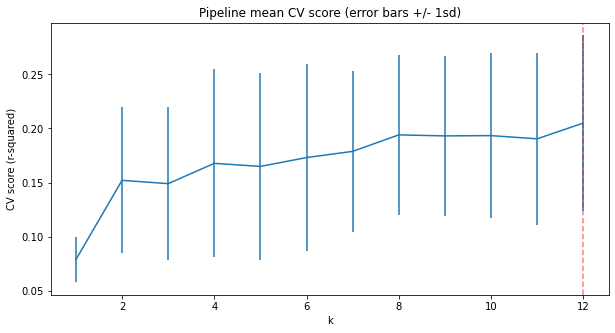

In [168]:
#Code task 20#
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [169]:
#Code task 18#
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

The above can be particularly useful as your pipelines becomes more complex (you can even nest pipelines within pipelines).

In [170]:
k = [k+1 for k in range(len(Xbatch_train.columns))]
grid_params = {'selectkbest__k': k}

Now you have a range of `k` to investigate. Is 1 feature best? 2? 3? 4? All of them? You could write a for loop and iterate over each possible value, doing all the housekeeping oyurselves to track the best value of k. But this is  a common task so there's a built in function in `sklearn`. This is [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
This takes the pipeline object, in fact it takes anything with a `.fit()` and `.predict()` method. In simple cases with no feature selection or imputation or feature scaling etc. you may see the classifier or regressor object itself directly passed into `GridSearchCV`. The other key input is the parameters and values to search over. Optional parameters include the cross-validation strategy and number of CPUs to use.

In [171]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [172]:
lr_grid_cv.fit(Xbatch_train, ybatch_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=8,
                                                    score_func=<function f_regression at 0x0000022D779F4550>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12]})

In [173]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [174]:
#Code task 19#
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 12}

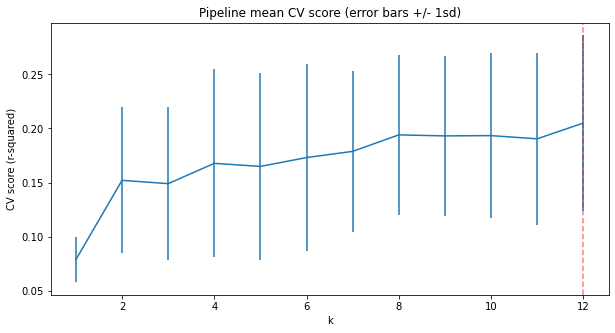

In [175]:
#Code task 20#
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [176]:
#Code task 21#
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = Xbatch_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Total Hops               1.63
cu_high                  1.22
fermenter_temperature    0.29
cu_setpoint              0.20
cu_low                   0.10
Whirlpool               -0.01
base_malt_pct           -0.07
rcp_id                  -0.94
Boil Kettle             -1.39
original_gravity        -1.56
Fermenter               -1.97
pre_run_dump_volume     -2.61
dtype: float64

## 4.10 Random Forest Model<a id='4.10_Random_Forest_Model'></a>

A model that can work very well in a lot of cases is the random forest. For regression, this is provided by `sklearn`'s `RandomForestRegressor` class.

Time to stop the bad practice of repeatedly checking performance on the test split. Instead, go straight from defining the pipeline to assessing performance using cross-validation. `cross_validate` will perform the fitting as part of the process. This uses the default settings for the random forest so you'll then proceed to investigate some different hyperparameters.

### 4.10.1 Define the pipeline<a id='4.10.1_Define_the_pipeline'></a>

In [177]:
#Code task 22#
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

### 4.10.2 Fit and assess performance using cross-validation<a id='4.10.2_Fit_and_assess_performance_using_cross-validation'></a>

In [178]:
#Code task 23#
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, Xbatch_train, ybatch_train, cv=5)

In [179]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.47828305, 0.38312776, 0.29048729, 0.35453512, 0.3897903 ])

In [180]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.3792447034504211, 0.06070144092727446)

### 4.10.3 Hyperparameter search using GridSearchCV<a id='4.10.3_Hyperparameter_search_using_GridSearchCV'></a>

Random forest has a number of hyperparameters that can be explored, however here you'll limit yourselves to exploring some different values for the number of trees. You'll try it with and without feature scaling, and try both the mean and median as strategies for imputing missing values.

In [181]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [182]:
#Code task 24#
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [183]:
#Code task 25#
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(Xbatch_train, ybatch_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [184]:
#Code task 26#
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 483,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

It looks like imputing with the median helps, but scaling the features doesn't.

In [185]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, Xbatch_train, ybatch_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.46905275, 0.42989883, 0.31120981, 0.34420397, 0.43656052])

In [186]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.3981851759339543, 0.059965522567046056)

You've marginally improved upon the default CV results. Random forest has many more hyperparameters you could tune, but we won't dive into that here.

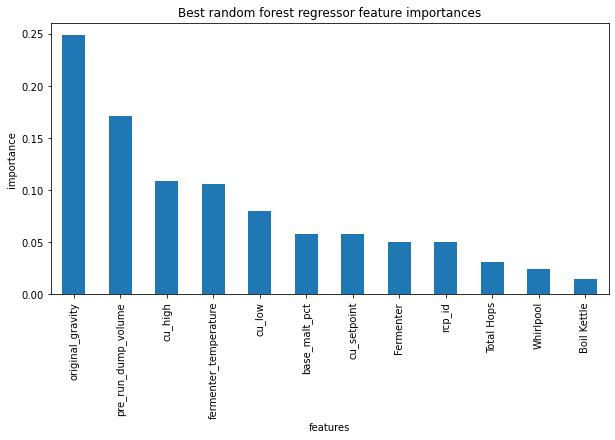

In [187]:
#Code task 27#
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=Xbatch_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Encouragingly, the dominant top four features are in common with your linear model:
* fastQuads
* Runs
* Snow Making_ac
* vertical_drop

## 4.11 Final Model Selection<a id='4.11_Final_Model_Selection'></a>

Time to select your final model to use for further business modeling! It would be good to revisit the above model selection; there is undoubtedly more that could be done to explore possible hyperparameters.
It would also be worthwhile to investigate removing the least useful features. Gathering or calculating, and storing, features adds business cost and dependencies, so if features genuinely are not needed they should be removed.
Building a simpler model with fewer features can also have the advantage of being easier to sell (and/or explain) to stakeholders.
Certainly there seem to be four strong features here and so a model using only those would probably work well.
However, you want to explore some different scenarios where other features vary so keep the fuller 
model for now. 
The business is waiting for this model and you have something that you have confidence in to be much better than guessing with the average price.

Or, rather, you have two "somethings". You built a best linear model and a best random forest model. You need to finally choose between them. You can calculate the mean absolute error using cross-validation. Although `cross-validate` defaults to the $R^2$ [metric for scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring) regression, you can specify the mean absolute error as an alternative via
the `scoring` parameter.

### 4.11.1 Linear regression model performance<a id='4.11.1_Linear_regression_model_performance'></a>

In [188]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, Xbatch_train, ybatch_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [189]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(4.283595676163197, 0.5759705769532845)

In [190]:
mean_absolute_error(ybatch_test, lr_grid_cv.best_estimator_.predict(Xbatch_test))

4.399742209171063

### 4.11.2 Random forest regression model performance<a id='4.11.2_Random_forest_regression_model_performance'></a>

In [191]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, Xbatch_train, ybatch_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [192]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(3.464560517355867, 0.45234518802491375)

In [193]:
mean_absolute_error(ybatch_test, rf_grid_cv.best_estimator_.predict(Xbatch_test))

3.2871887236358974

### 4.11.3 Conclusion<a id='4.11.3_Conclusion'></a>

The random forest model has a lower cross-validation mean absolute error by almost \\$1. It also exhibits less variability. Verifying performance on the test set produces performance consistent with the cross-validation results.

## 4.12 Data quantity assessment<a id='4.12_Data_quantity_assessment'></a>

Finally, you need to advise the business whether it needs to undertake further data collection. Would more data be useful? We're often led to believe more data is always good, but gathering data invariably has a cost associated with it. Assess this trade off by seeing how performance varies with differing data set sizes. The `learning_curve` function does this conveniently.

In [194]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, Xbatch_train, ybatch_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

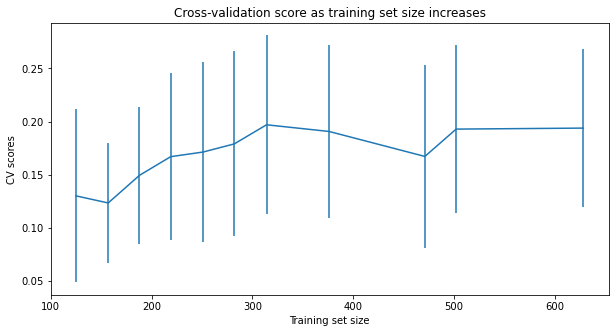

In [195]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

This shows that you seem to have plenty of data. There's an initial rapid improvement in model scores as one would expect, but it's essentially levelled off by around a sample size of 40-50.

## 4.13 Save best model object from pipeline<a id='4.13_Save_best_model_object_from_pipeline'></a>

In [196]:
#Code task 28#
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in Xbatch_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [197]:
# save the model

modelpath = './models'
save_file(best_model, 'batch_clar_eff_model.pkl', modelpath)

A file already exists with this name.

Writing file.  "./models\batch_clar_eff_model.pkl"


## 4.14 Summary<a id='4.14_Summary'></a>

**Q: 1** Write a summary of the work in this notebook. Capture the fact that you gained a baseline idea of performance by simply taking the average price and how well that did. Then highlight that you built a linear model and the features that found. Comment on the estimate of its performance from cross-validation and whether its performance on the test split was consistent with this estimate. Also highlight that a random forest regressor was tried, what preprocessing steps were found to be best, and again what its estimated performance via cross-validation was and whether its performance on the test set was consistent with that. State which model you have decided to use going forwards and why. This summary should provide a quick overview for someone wanting to know quickly why the given model was chosen for the next part of the business problem to help guide important business decisions.

**A: 1** Three models were evaluated in this notebook - the mean model, a linear model, and a random forest model. The mean provided a baseline comparison, coming in with a MAE of ~19. 

The linear model was evaluated with both median and mean imputed values, with MAE being improved upon the mean model to ~9 for both impute approaches. Refining the linear model using k best features identied 8 features performed the best, and this brought the MAE to ~12 with the following features and their respecitve coeffiecients:

* vertical_drop        10.767857
* Snow Making_ac        6.290074
* total_chairs          5.794156
* fastQuads             5.745626
* Runs                  5.370555
* LongestRun_mi         0.181814
* trams                -4.142024
* SkiableTerrain_ac    -5.249780

Further, cross-validation provides CV values in line with this linear model and suggests that the uncertainty falls to under a dollar with high confidence (am I interpreting that correctly?). 

The random forest model was evaluated using median imputed values and standard scaling, and its MAE came in at ~9. Cross-validation provides consistent CV values with a low standard deviation. It also identified fast quads, number of runs, snow making acreage, and vertical drop as important features. Because the random forest model has a lower cross-validation mean absolute error by almost 1 and exhibits less variability, it has been chosen as the model moving forward.